As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to <mark>show how **four** treatments **(Capomulin, Infubinol, Ketapril, and Placebo)** compare.</mark>

To do this you are tasked with:

- [x] Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
- [x] Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
- [ ] Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
- [ ] Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
- [ ] Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations.

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib library.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
* Your scatter plots must include [error bars](https://en.wikipedia.org/wiki/Error_bar). This will allow the company to account for variability between mice. You may want to look into [`pandas.DataFrame.sem`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sem.html) for ideas on how to calculate this.
* Remember when making your plots to consider aesthetics!
  * Your legends should not be overlaid on top of any data.
  * Your bar graph should indicate tumor growth as red and tumor reduction as green.
    It should also include a label with the percentage change for each bar.

In [825]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [826]:
# Read the Mouse and Drug Data
mouseDrug_df = pd.read_csv(mouse_drug_data_to_load)
#mouseDrug_df.head()
mouseDrug_df
#mouseDrug_df.columns

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
...,...,...
245,i669,Placebo
246,r850,Placebo
247,a262,Placebo
248,q787,Placebo


In [827]:
# Read the the Clinical Trial Data
clincalTrial_df = pd.read_csv(clinical_trial_data_to_load)
#clincalTrial_df.head()

clincalTrial_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [828]:
# Combine the data into a single dataset
combined_df = pd.merge(clincalTrial_df, mouseDrug_df, on='Mouse ID', how='left')

# Display the data table for preview
combined_df.head()

# print(combined_df['Mouse ID'].value_counts())
# print(combined_df['Timepoint'].value_counts())
# print(combined_df['Tumor Volume (mm3)'].value_counts())
# print(combined_df['Metastatic Sites'].value_counts())
# print(combined_df['Drug'].value_counts())



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [829]:
combined_df.keys

<bound method NDFrame.keys of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0        b128          0           45.000000                 0  Capomulin
1        f932          0           45.000000                 0   Ketapril
2        g107          0           45.000000                 0   Ketapril
3        a457          0           45.000000                 0   Ketapril
4        c819          0           45.000000                 0   Ketapril
...       ...        ...                 ...               ...        ...
1901     r944         45           41.581521                 2  Capomulin
1902     u364         45           31.023923                 3  Capomulin
1903     p438         45           61.433892                 1   Ceftamin
1904     x773         45           58.634971                 4    Placebo
1905     b879         45           72.555239                 2   Stelasyn

[1906 rows x 5 columns]>

## Tumor Response to Treatment

In [830]:
#groupByDrugTimepoint = combined_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)']
#tumorVolMeans_df = groupByDrugTimepoint.mean()
#tumorVolMeans_df = tumorVolMeans_df.reset_index()
#tumorVolMeans_df
#tumorVolMeans_df["Timepoint"].unique()


In [831]:
# pd.options.display.max_rows = 30

In [832]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
groupByDrugTimepoint = combined_df.groupby(['Drug', 'Timepoint'])
tumorVolMeans_df = groupByDrugTimepoint['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html
# https://stackoverflow.com/questions/20110170/turn-pandas-multi-index-into-column
tumorVolMeans_df = tumorVolMeans_df.reset_index()

# Preview DataFrame
tumorVolMeans_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [833]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorVolStdErr_df = groupByDrugTimepoint['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
tumorVolStdErr_df = tumorVolStdErr_df.reset_index()

# Preview DataFrame
tumorVolStdErr_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [834]:
# Minor Data Munging to Re-Format the Data Frames

# use pivot to make Drug columns and Timepoint index for rows, 
# values are mean of Tumor Volume
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html 

tumorVolMeansPivot_df = pd.pivot_table(tumorVolMeans_df, index="Timepoint", columns="Drug")

# Preview that Reformatting worked
tumorVolMeansPivot_df = tumorVolMeansPivot_df['Tumor Volume (mm3)']
tumorVolMeansPivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [835]:
#https://stackoverflow.com/questions/27576795/flatten-dataframe-with-multi-index-columns
    #pd.melt(tumorVolMeansPivot_df.reset_index(), id_vars=['Timepoint'], value_name='stock')
#pd.melt(tumorVolMeansPivot_df.reset_index(), id_vars=['Timepoint'], value_name='Tumor Vol')

In [836]:
#https://stackoverflow.com/questions/27576795/flatten-dataframe-with-multi-index-columns
# means_unstack = tumorVolMeansPivot_df.unstack().reset_index().drop('level_0', axis=1)
# means_unstack

# means_unstack = tumorVolMeansPivot_df.unstack()
# means_unstack

# means_unstack = tumorVolMeansPivot_df.unstack().reset_index().drop('level_0', axis=1)
# means_unstack

In [837]:
# Minor Data Munging to Re-Format the Data Frames
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html 

# use pivot to make Drug columns and Timepoint index for rows, 
# values are std error of Tumor Volume
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html
tumorVolStdErrPivot_df = pd.pivot_table(tumorVolStdErr_df, index="Timepoint", columns="Drug")

# Preview that Reformatting worked
tumorVolStdErrPivot_df = tumorVolStdErrPivot_df['Tumor Volume (mm3)']
tumorVolStdErrPivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [838]:
# DELETE THESE ATTEMPTS
#df = tumorVolMeansPivot_df['Tumor Volume (mm3)']
#df.loc[df.index == 5]
#ndf.reset_index(inplace=True)
#ndf.plot(kind='scatter', x='Timepoint', y='Capomulin', title='Timepoint vs Tumor Volume (mm3) by Drug')
#ndf.plot(kind='scatter', x='Timepoint', y='Ceftamin')


#tumorVolMeans_df[['Timepoint']]
#df = tumorVolMeansPivot_df[['Tumor Volume (mm3)']].reset_index()
#ndf= pd.DataFrame(df['Tumor Volume (mm3)']['Capomulin'])
#ndf
#pd.Series(ndf['Capomulin'])
#ndf['Capomulin']
#ndf
#n2 = ndf[['Capomulin']]
#n2
#ndf.reset_index
#ndf.plot(kind='scatter', x='Timepoint', y='Capomulin')

#tumorVolMeansPivot_df['Capomulin']

In [839]:
# # DELETE THESE ATTEMPTS
# df = tumorVolMeansPivot_df['Tumor Volume (mm3)']
# colnames = list(df.columns)
# colnames
# colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 
#           'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 
#           'tab:olive', 'tab:cyan']

# [print(f"Column: {column}, color" {color})]
# df.plot()


In [840]:
# DELETE THESE ATTEMPTS 
#df = tumorVolMeansPivot_df
#colnames = list(df.columns)
#df['Capomulin']
#df['Timepoint']
#df['Tumor Volume (mm3)']
#df[['Timepoint']]

#print(df[['Timepoint']])
#print("\n")
#df[['Tumor Volume (mm3)']]
#print(df[['Tumor Volume (mm3)']])
#print("\n")

#list(df.columns)
#df["Capomulin"]


### Homework Notes
* Readme asks for scatterplots here
* Sample images and starter jupyter notebook show line plots
* Cannot get scatter plots to plot multiple columns of data onto same graph
* Using Linegraphs with no lines to plot Tumor Volume over Time points for each drug to approximate a scatter plot
* Subsequently using linegraphs for rest of the plots


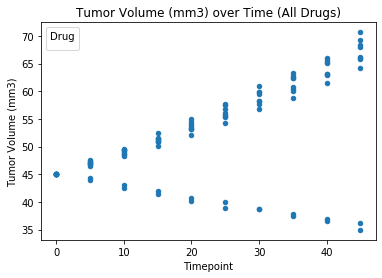

In [841]:
# Initial Scatter Plot of all the Means Data not grouped by Drug
df = tumorVolMeans_df
ax = df.plot(kind="scatter",
       x="Timepoint", y="Tumor Volume (mm3)",
       title="Tumor Volume (mm3) over Time (All Drugs)")

#create the legend
ax.legend(ax.get_lines(), df.columns, loc='best', title="Drug")
plt.show()

In [842]:
# checking some values df.shape[1]
#err_df.shape[1]
#ax.get_lines()

In [843]:
# # Generate the Plot (with Error Bars)

# df = tumorVolMeansPivot_df
# err_df = tumorVolStdErrPivot_df

# colnames = list(df.columns)

# #df.plot(figsize=(12,8), style=['^-', 'o--', 'x-.', 'D-'], markersize=14, ax = ax)

# #plot the means data with error bars (yerr= err_df)
# # df.index is the x-axis of this plot no need to reset_index()
# ax = df.plot(y=colnames, yerr = err_df,
#         kind = 'line', legend=False, 
#         subplots = False, sharex = True, figsize = (8,8), 
#         ls="-", marker="o",
#         title='Tumor Volume over Time for each Drug', grid=True)

# # clean up labels
# plt.xlabel("Time (Days)")
# plt.ylabel("Tumor Volume (mm3)")

# # set the line markers
# # from: https://stackoverflow.com/questions/39246115/pandas-dataframe-line-plot-show-random-markers
# # use fillable markers.  randomly chose a list of valid markers
# valid_markers = mpl.markers.MarkerStyle.filled_markers
# markers = np.random.choice(valid_markers, df.shape[1], replace=False)

# print(f"Markers = {markers}")
# for i, line in enumerate(ax.get_lines()):
#     #print(f"i = {i}")
#     line.set_marker(markers[i])

# #create the legend
# ax.legend(ax.get_lines(), df.columns, loc='best', title="Drug")

# # asthetics for plot area of graph
# plt.xlim(-1, max(df.index) * 1.1)
# plt.ylim(min(df.min() * 0.9), max(df.max()) * 1.1)

# #plot the graph
# plt.tight_layout()
# plt.show()


In [844]:
# Initial Plot.  Replaced with function above
# #plot the means data with error bars (yerr= err_df)
# # df.index is the x-axis of this plot no need to reset_index()
# ax = df.plot(y=colnames, yerr = err_df,
#         kind= 'line', legend=True, 
#         subplots = False, sharex = True, figsize = (8,8), #ls="-", 
#         #style= styles, #marker= markers),
#         title='Tumor Volume over Time for each Drug', grid=True)

# # clean up labels
# plt.xlabel("Time (Days)")
# plt.ylabel("Tumor Volume (mm3)")

# # set the line markers because error bars have wiped them out
# for i, line in enumerate(ax.get_lines()):
#     # print(f"i = {i}")
#     #line.style(linestyles[i])
#     line.set_marker(markers[i])

# # re-create the legend with the markers
# ax.legend(ax.get_lines(), df.columns, loc='best', title="Drug")

# # asthetics for plot area of graph
# plt.xlim(-1, max(df.index) * 1.1)
# plt.ylim(min(df.min() * 0.9), max(df.max()) * 1.1)

# # plot the graph & save the Figure
# plt.tight_layout()
# plt.savefig("./results/TumorVolume_vs_Time.png", format='png', dpi=100)
# plt.show()

In [845]:
# Function to plot line charts for the drug treament trials
# 3 plots out of the assingment use this format
# None = Null Object  https://stackoverflow.com/questions/3289601/null-object-in-python
def drugLinePlot(df, markers, title, 
                 err_df=None,
                 xlabel='', ylabel='', legendLabel='', 
                 figsize=(8,8),
                 saveFileName='',
                 xgrid=False, ygrid=True
                ) :

    colnames = list(df.columns)

    if (err_df is None) :
        # no error data, just plot the data
        # df.index is the x-axis of this plot
        ax = df.plot(y=colnames,
                     kind= 'line', legend=True, 
                     subplots = False, sharex = True, 
                     figsize = figsize, 
                     title=title)
    else:
        # plot the data with error bars (yerr= err_df)
        # df.index is the x-axis of this plot
        ax = df.plot(y=colnames, 
                     yerr = err_df,
                     kind= 'line', legend=True, 
                     subplots = False, sharex = True, 
                     figsize = figsize, 
                     title=title)
 
    # enable or disable x & y-axis grid lines
    ax.xaxis.grid(xgrid)
    ax.yaxis.grid(ygrid)
    
    # clean up labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # set the line markers because error bars have wiped them out
    for i, line in enumerate(ax.get_lines()):
        # print(f"i = {i}")
        #line.style(linestyles[i])
        line.set_marker(markers[i])

    # asthetics for plot area of graph
    max_x = max(df.index)
    min_x = min(df.index)
    max_y = max(df.max()) 
    min_y = min(df.min())
    min_y = (min_y // 10 * 10)
    
    print(f"min_x = {min_x}, max_x = {max_x}")
    print(f"min_y = {min_y}, max_y = {max_y}")
    print(f"min(df.min()) = {min(df.min())}, max(df.max()) = {max(df.max())}") 

    
    plt.xlim(-1, max_x * 1.1)
    plt.ylim(min_y - 0.25, max_y * 1.05)
    
    #tick step size
    # https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html
    # https://stackoverflow.com/questions/6682784/reducing-number-of-plot-ticks
    # https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib
    
    # Calculate the y_step increment by calculateing the range of y
    # increment is 5 / 1o** some_power
    # some_power is # of digits in range of y (use log10)
    # https://stackoverflow.com/questions/6769406/rounding-to-a-power-of-10
    y_diff = max_y - min_y
    power = np.ceil(np.log10(y_diff)) - 2
    y_step = 5 * (10 ** power)
    print(f"power= {power}, y_step = {y_step}")
          
    plt.xticks(np.arange(min_x, max_x+1, step = 10.0))
    plt.yticks(np.arange(min_y, max_y+1, step = y_step))
    
    # re-create the legend with the markers
    ax.legend(ax.get_lines(), df.columns, loc='best', title=legendLabel)

    # plot the graph & save the Figure
    plt.tight_layout()
    if (saveFileName != '') :
        plt.savefig(saveFileName, format='png', dpi=100)
    plt.show()
    

In [846]:
print(5//10 * 10)
print(0//10 * 10)
print(-5 // 10 * 10)
print (-5 // 10)

0
0
-10
-1


In [847]:
np.log10(0.1)
print(5 * (10 ** (100 * np.log10(0.1))))
print(np.log10(1), 5 * (10 ** (100 * np.log10(1))))

5e-100
0.0 5.0


In [848]:
bases = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for b in bases :
    print(f"log10({b}) = {np.log10(b)}, 10 ** {(np.log10(b) - 3 )} = {(10 ** (np.log10(b)- 3 ))}") 

log10(0.001) = -3.0, 10 ** -6.0 = 1e-06
log10(0.01) = -2.0, 10 ** -5.0 = 1e-05
log10(0.1) = -1.0, 10 ** -4.0 = 0.0001
log10(1) = 0.0, 10 ** -3.0 = 0.001
log10(10) = 1.0, 10 ** -2.0 = 0.01
log10(100) = 2.0, 10 ** -1.0 = 0.1
log10(1000) = 3.0, 10 ** 0.0 = 1.0


In [849]:
# drugLinePlot(df=df, err_df=err_df, 
#              colnames=colnames, markers=markers,
#              title='Tumor Volume over Time for each Drug',
#              xlabel='', ylabel='', legendLabel='',
#              figsize=(10,10),
#              saveFileName="./results/TumorVolume_vs_Time.png"
#             )



In [850]:
# Generate the Plot (with Error Bars)
# set the plotting dfs
df = tumorVolMeansPivot_df
err_df = tumorVolStdErrPivot_df
#colnames = list(df.columns)

In [851]:
# from: https://stackoverflow.com/questions/39246115/pandas-dataframe-line-plot-show-random-markers
# use fillable markers.  randomly chose a list of valid markers
valid_markers = mpl.markers.MarkerStyle.filled_markers
markers = np.random.choice(valid_markers, df.shape[1], replace=False)
print(f"Markers = {markers}")


Markers = ['H' 'X' 'P' '*' 'v' '<' 'p' 'd' 's' '8']


min_x = 0, max_x = 45
min_y = 30.0, max_y = 70.66295760897273
min(df.min()) = 34.955594791755, max(df.max()) = 70.66295760897273
power= 0.0, y_step = 5.0


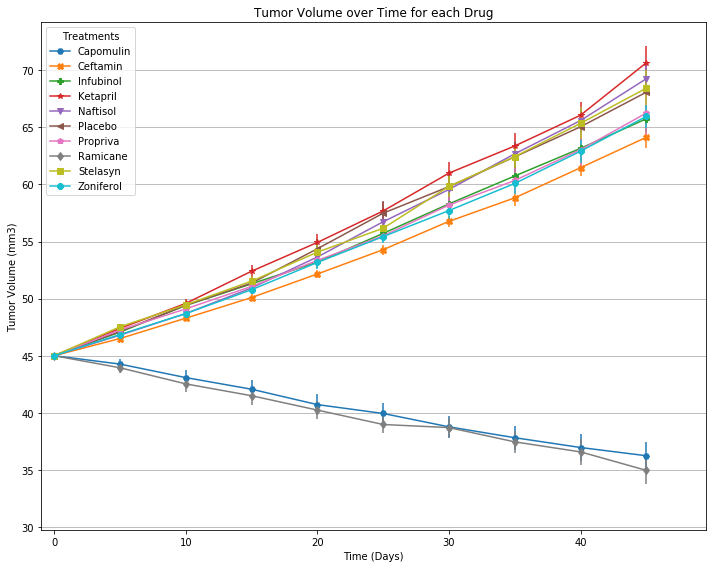

In [852]:
# Generate the Plot (with Error Bars)
# set the plotting dfs
df = tumorVolMeansPivot_df
err_df = tumorVolStdErrPivot_df

# Show plot for all data
drugLinePlot(df=df, err_df=err_df, 
             markers=markers,
             title='Tumor Volume over Time for each Drug',
             xlabel='Time (Days)', ylabel='Tumor Volume (mm3)', legendLabel='Treatments',
             figsize=(10,8),
             saveFileName="./results/TumorVolume_vs_Time_all.png",
             xgrid=False, ygrid=True
            )


min_x = 0, max_x = 45
min_y = 30.0, max_y = 70.66295760897273
min(df.min()) = 36.23611379944762, max(df.max()) = 70.66295760897273
power= 0.0, y_step = 5.0


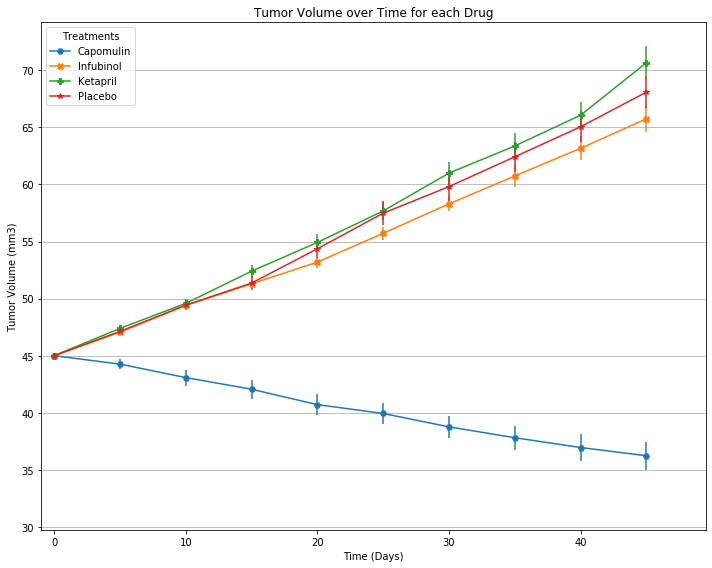

In [853]:
# Generate the Plot (with Error Bars)
# set the plotting dfs
df = tumorVolMeansPivot_df
err_df = tumorVolStdErrPivot_df

# show plot for just 4 drug treatments: Capomulin, Infubinol, Ketapril, and Placebo
colnames = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo' ] #, 'Ramicane', 'Zoniferol']

#print(df[colnames])
#print(err_df[colnames])
drugLinePlot(df=df[colnames], err_df=err_df[colnames], 
             markers=markers,
             title='Tumor Volume over Time for each Drug',
             xlabel='Time (Days)', ylabel='Tumor Volume (mm3)', legendLabel='Treatments',
             figsize=(10,8),
             saveFileName="./results/TumorVolume_vs_Time.png",
             xgrid=False, ygrid=True
            )

In [854]:
# # Show the Figure
# plt.tight_layout()
# fig1 = plt.gcf()
# plt.show()
# plt.draw()

# # Save the Figure
# plt.savefig("./results/TumorVolume_vs_Time.png", format='png', dpi=300)
# fig1.savefig("./results/TumorVolume_vs_Time2.png", format='png', dpi=100)


# Tumor Volume vs Time Analysis
* For the 4 drug treatments in focus for the assignment ('Capomulin', 'Infubinol', 'Ketapril', 'Placebo')
    + **Capomulin** appears to be effective at reducing tumor volume for this form of cancer in mice. 
    + All other drug treatments do not have noticible effect on reducing tumor volume


* Expanding analysis to all the treatments in the data
    + **Ramicane** also appears to be effective at reducing tumor volume for this form of cancer in mice
    + All other drug treatments do not have noticible effect on reducing tumor volume

<p>&nbsp;</p>

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [855]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metGroupByDrugTimepoint = combined_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites']

# Convert to DataFrame
metMeans_df = pd.DataFrame(metGroupByDrugTimepoint.mean())
#metMeans_df = metMeans_df.reset_index()

# Preview DataFrame
metMeans_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [856]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metStdErr_df = pd.DataFrame(metGroupByDrugTimepoint.sem())

# Convert to DataFrame
#metStdErr_df = metStdErr_df.reset_index()
# Preview DataFrame
metStdErr_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [857]:
# Minor Data Munging to Re-Format the Data Frames
metMeansPivot_df = pd.pivot_table(metMeans_df, index="Timepoint", columns="Drug")
metMeansPivot_df = metMeansPivot_df['Metastatic Sites']
# Preview that Reformatting worked
metMeansPivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [858]:
# Minor Data Munging to Re-Format the Data Frames
metStdErrPivot_df = pd.pivot_table(metStdErr_df, index="Timepoint", columns="Drug")
metStdErrPivot_df = metStdErrPivot_df['Metastatic Sites']
# Preview that Reformatting worked
metStdErrPivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [859]:
# # Generate the Plot (with Error Bars)plot the means data with error bars (yerr= err_df)
# # df.index is the x-axis of this plot no need to reset_index()
# ax = df.plot(y=colnames, yerr = err_df,
#         kind= 'line', legend=True, 
#         subplots = False, sharex = True, figsize = (10,10), #ls="-", 
#         #style= styles, #marker= markers),
#         title='Metastatic Sites over Time for each Drug', grid=True)

# # clean up labels
# plt.xlabel("Time (Days)")
# plt.ylabel("Metastatic Sites")

# # set the line markers because error bars have wiped them out
# for i, line in enumerate(ax.get_lines()):
#     line.set_marker(markers[i])

# # re-create the legend with the markers
# ax.legend(ax.get_lines(), df.columns, loc='best', title="Drug")

# # asthetics for plot area of graph
# plt.xlim(-1, max(df.index) * 1.1)
# plt.ylim(min(df.min() * 0.9), max(df.max()) * 1.1)

# # Save the Figure
# plt.tight_layout()
# plt.savefig("./results/MetastaticSites_vs_Time.png", format='png', dpi=100)

# # Show the Figure
# plt.show()

min_x = 0, max_x = 45
min_y = 0.0, max_y = 3.3636363636363638
min(df.min()) = 0.0, max(df.max()) = 3.3636363636363638
power= -1.0, y_step = 0.5


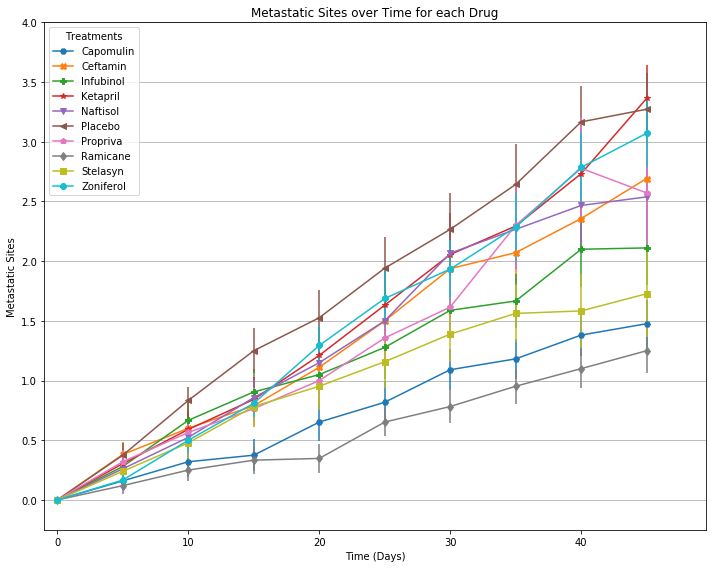

In [860]:
# Generate the Plot (with Error Bars)
# set the plotting dfs
df = metMeansPivot_df
err_df = metStdErrPivot_df

# show plot for all drug treatments (all column names)
colnames = list(df.columns)

drugLinePlot(df=df[colnames], err_df=err_df[colnames],  
             markers=markers,
             title='Metastatic Sites over Time for each Drug',
             xlabel='Time (Days)', ylabel='Metastatic Sites', legendLabel='Treatments',
             figsize=(10,8),
             saveFileName="./results/MetastaticSites_vs_Time_all.png",
             xgrid=False, ygrid=True
            )

min_x = 0, max_x = 45
min_y = 0.0, max_y = 3.3636363636363638
min(df.min()) = 0.0, max(df.max()) = 3.3636363636363638
power= -1.0, y_step = 0.5


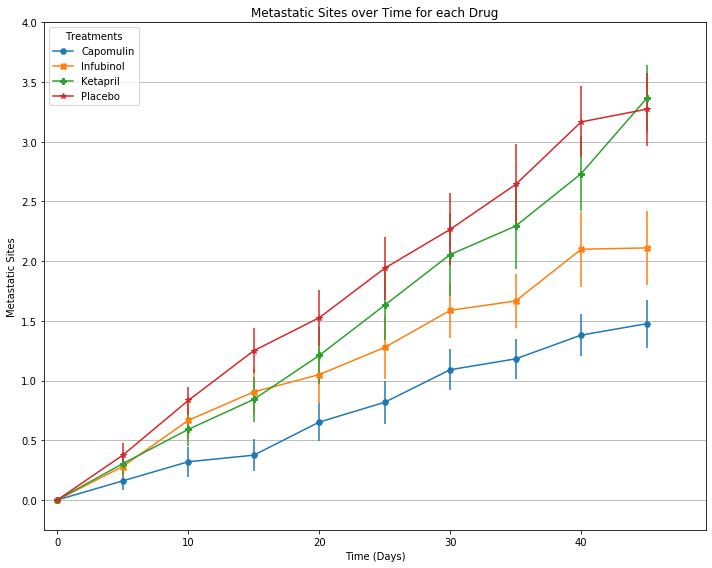

In [861]:
df = metMeansPivot_df
err_df = metStdErrPivot_df

# show plot for just 4 drug treatments: Capomulin, Infubinol, Ketapril, and Placebo
colnames = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo' ] #, 'Ramicane', 'Zoniferol']
#colnames = list(df.columns)

drugLinePlot(df=df[colnames], err_df=err_df[colnames], 
             markers=markers,
             title='Metastatic Sites over Time for each Drug',
             xlabel='Time (Days)', ylabel='Metastatic Sites', legendLabel='Treatments',
             figsize=(10,8),
             saveFileName="./results/MetastaticSites_vs_Time_4drugs.png",
             xgrid=False, ygrid=True
            )

# Metastatic sites vs Time Analysis
* For the 4 drug treatments in focus for the assignment ('Capomulin', 'Infubinol', 'Ketapril', 'Placebo')
    + **Capomulin** is most effective at lowering occurence of metastatic sites for this form of cancer in mice. 
    + All other drug treatments do not have noticible effect on reducing tumor volume
    + The standard error for **Capomulin is well below that for Placebo and the other drug treatments.  So visually the lower metastatic rate for Capomulin seems statitically relevant.


* Expanding analysis to all the treatments in the data
    + **Ramicane** is most effective at lowering occurence of metastatic sites for this form of cancer in mice
    + All other drug treatments do not have noticible effect on reducing tumor volume

<p>&nbsp;</p>

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [862]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
miceGroupByDrugTimepoint = combined_df.groupby(['Drug', 'Timepoint'])['Mouse ID']
miceCounts = miceGroupByDrugTimepoint.count()

# Convert to DataFrame
miceCount_df = pd.DataFrame(miceCounts)

# Preview DataFrame
miceCount_df.rename(columns={'Mouse ID' : 'Mouse Count'}, inplace=True)
miceCount_df.reset_index(inplace=True)

#combined_df
miceCount_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [863]:
# Minor Data Munging to Re-Format the Data Frames
miceCountPivot_df = pd.pivot_table(miceCount_df, index="Timepoint", columns="Drug")
miceCountPivot_df = miceCountPivot_df['Mouse Count']
# Preview the Data Frame

# Preview that Reformatting worked
miceCountPivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [864]:
(miceCountPivot_df / miceCountPivot_df.iloc[0]) * 100

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


min_x = 0, max_x = 45
min_y = 20.0, max_y = 100.0
min(df.min()) = 26.923076923076923, max(df.max()) = 100.0
power= 0.0, y_step = 5.0


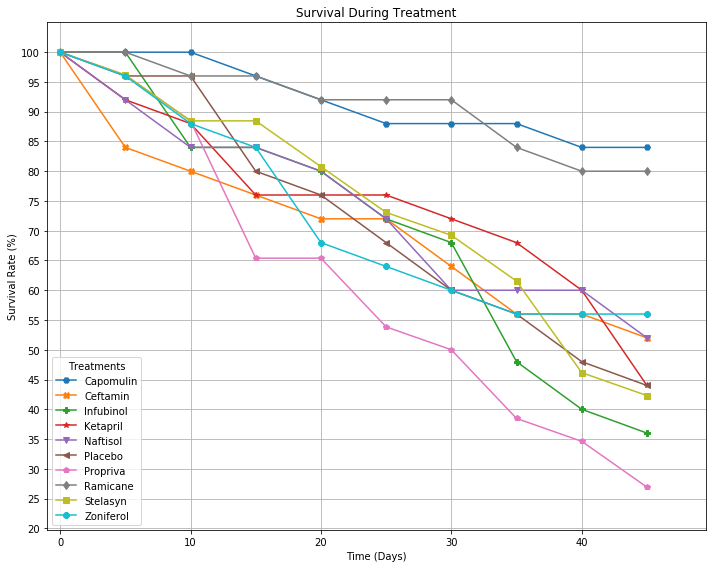

In [865]:
# Generate the Plot (Accounting for percentages)
# Generate the Plot with no Error Bars
# set the plotting dfs

# calculate % mouse Survival over time
df = (miceCountPivot_df / miceCountPivot_df.iloc[0]) * 100

# show plot for all drug treatments (all column names)
colnames = list(df.columns)

drugLinePlot(df=df[colnames], 
             markers=markers,
             title='Survival During Treatment',
             xlabel='Time (Days)', ylabel='Survival Rate (%)', legendLabel='Treatments',
             figsize=(10,8),
             saveFileName="./results/survivalRates_all.png",
             xgrid=True, ygrid=True
            )
# Save the Figure

# Show the Figure
plt.show()

min_x = 0, max_x = 45
min_y = 30.0, max_y = 100.0
min(df.min()) = 36.0, max(df.max()) = 100.0
power= 0.0, y_step = 5.0


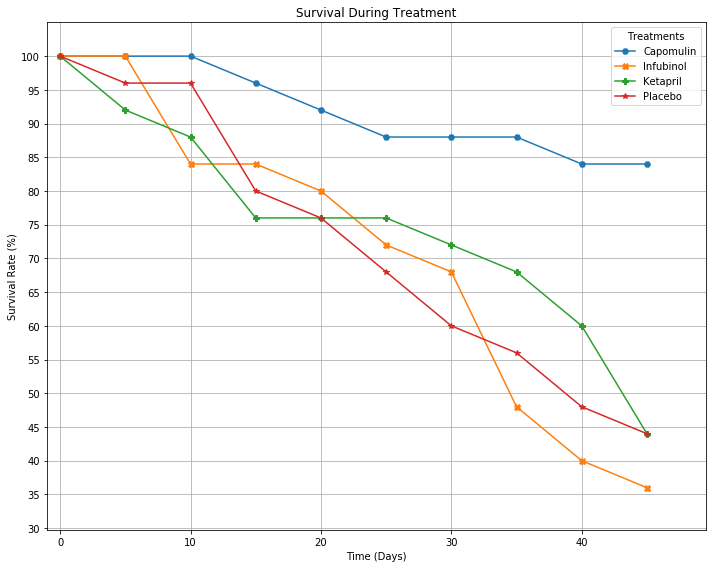

In [866]:
# Generate the Plot (Accounting for percentages)
# Generate the Plot with No Error Bars
# set the plotting dfs

# calculate % mouse Survival over time
df = (miceCountPivot_df / miceCountPivot_df.iloc[0]) * 100

# show plot for just 4 drug treatments: Capomulin, Infubinol, Ketapril, and Placebo
colnames = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo' ] #, 'Ramicane', 'Zoniferol']

drugLinePlot(df=df[colnames], 
             markers=markers,
             title='Survival During Treatment',
             xlabel='Time (Days)', ylabel='Survival Rate (%)', legendLabel='Treatments',
             figsize=(10,8),
             saveFileName="./results/survivalRates_4drugs.png",
             xgrid=True, ygrid=True
            )

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [867]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [868]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined

![Metastatic Spread During Treatment](../Images/change.png)